##### ANN IMPLEMENTATION

In [ ]:
%pip install -q -U keras-tuner

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 127.9/127.9 kB 3.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 950.8/950.8 kB 28.5 MB/s eta 0:00:00


In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import tensorflow as tf
from tensorflow import keras

In [2]:
# Load dataset
(x_train, y_train), (x_test, y_test) = keras.datasets.fashion_mnist.load_data()

4422102/4422102 [==============================] - 0s 0us/step


In [3]:
# Explore dataset and preprocess
len(x_train), len(y_train), len(x_test), len(y_test)

(60000, 60000, 10000, 10000)

In [4]:
x_train.shape, y_train.shape, x_test.shape, y_test.shape

((60000, 28, 28), (60000,), (10000, 28, 28), (10000,))

In [5]:
y_train[0]

9

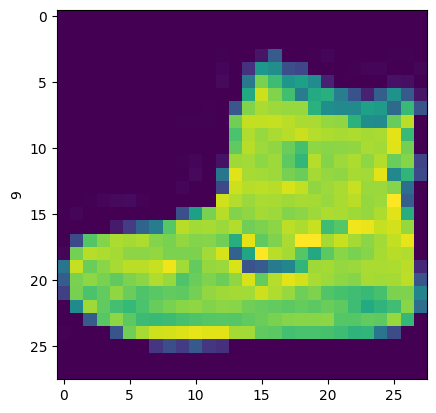

In [6]:
# visualize data
plt.imshow(x_train[0])
plt.ylabel(y_train[0])
plt.show()

In [7]:
# normalize dataset
X_train = x_train/255.0
X_test = x_test/255.0

In [8]:
# build model
def Ann_Model(a,b):
  model = keras.models.Sequential([
    keras.layers.Flatten(input_shape=x_train[0].shape),
    keras.layers.Dense(units=a, activation="relu"),
    keras.layers.Dense(units=b, activation="sigmoid"),
    keras.layers.Dense(units=10, activation="softmax")
  ])
  model.compile(optimizer=keras.optimizers.SGD(), loss="sparse_categorical_crossentropy", metrics=["accuracy"])
  return model

In [10]:
# train model
def train_Ann_Model(x: int, y: int):
  model = Ann_Model(200, 120)
  history = model.fit(
      X_train,
      y_train,
      epochs=x,
      batch_size=y,
      validation_data=(X_test,y_test),
      verbose=1
  )
  df = pd.DataFrame(history.history)
  df["epoch"] = history.epoch
  return (model, df)

In [11]:
# implement model
model, summary = train_Ann_Model(15,20)

Epoch 1/15
3000/3000 [==============================] - 14s 3ms/step - loss: 1.0092 - accuracy: 0.6893 - val_loss: 0.6764 - val_accuracy: 0.7619
Epoch 2/15
3000/3000 [==============================] - 9s 3ms/step - loss: 0.5914 - accuracy: 0.7928 - val_loss: 0.5631 - val_accuracy: 0.7988
Epoch 3/15
3000/3000 [==============================] - 8s 3ms/step - loss: 0.5100 - accuracy: 0.8210 - val_loss: 0.5107 - val_accuracy: 0.8196
Epoch 4/15
3000/3000 [==============================] - 10s 3ms/step - loss: 0.4698 - accuracy: 0.8350 - val_loss: 0.4860 - val_accuracy: 0.8257
Epoch 5/15
3000/3000 [==============================] - 9s 3ms/step - loss: 0.4452 - accuracy: 0.8416 - val_loss: 0.4630 - val_accuracy: 0.8344
Epoch 6/15
3000/3000 [==============================] - 9s 3ms/step - loss: 0.4265 - accuracy: 0.8485 - val_loss: 0.4534 - val_accuracy: 0.8348
Epoch 7/15
3000/3000 [==============================] - 9s 3ms/step - loss: 0.4123 - accuracy: 0.8536 - val_loss: 0.4455 - val_accurac

In [ ]:
# model performance
summary

,loss,accuracy,val_loss,val_accuracy,epoch
0,1.001358,0.696367,0.672032,0.7663,0
1,0.585669,0.795033,0.554516,0.8050,1
2,0.507177,0.822683,0.509292,0.8163,2
3,0.467798,0.834983,0.483315,0.8278,3
4,0.443017,0.844217,0.461471,0.8363,4
5,0.424993,0.849183,0.450976,0.8377,5
6,0.411127,0.854683,0.441438,0.8386,6
7,0.399426,0.858633,0.440783,0.8429,7
8,0.389663,0.862417,0.427178,0.8459,8
9,0.381192,0.864567,0.418314,0.8503,9


<Axes: >

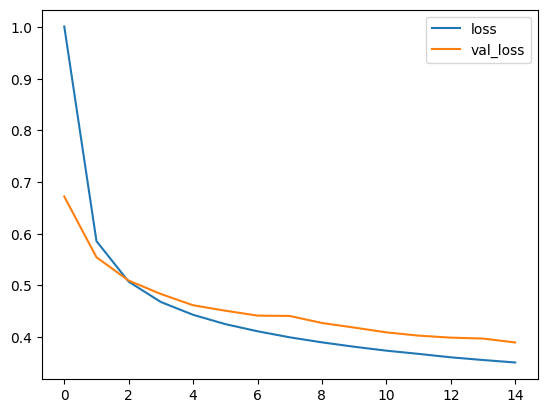

In [ ]:
# plot loss for traiming and testing dataset
summary[["loss","val_loss"]].plot()

<Axes: >

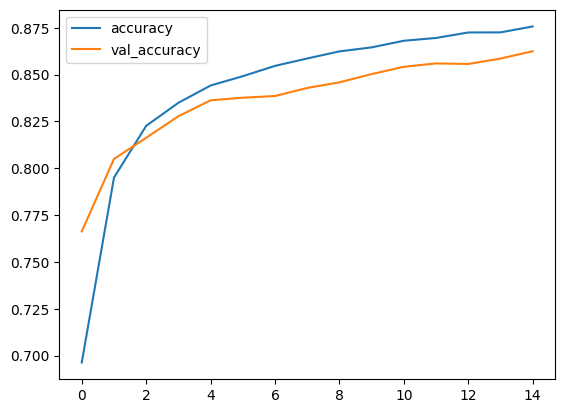

In [ ]:
# plot accuracy for training and testing data
summary[["accuracy", "val_accuracy"]].plot()

In [ ]:
# predict with model
y_pred = model.predict(X_test)
np.argmax(y_pred, axis=1)

313/313 [==============================] - 0s 2ms/step


array([9, 2, 1, ..., 8, 1, 5])

In [ ]:
# compare random predictions
for i in range(1000, 1011):
  print(f"Actual value is {y_test[i]} and Predicted value is {np.argmax(y_pred[i])}")

Actual value is 0 and Predicted value is 0
Actual value is 3 and Predicted value is 3
Actual value is 5 and Predicted value is 5
Actual value is 5 and Predicted value is 5
Actual value is 6 and Predicted value is 2
Actual value is 0 and Predicted value is 4
Actual value is 5 and Predicted value is 5
Actual value is 9 and Predicted value is 9
Actual value is 6 and Predicted value is 6
Actual value is 3 and Predicted value is 3
Actual value is 7 and Predicted value is 7


In [ ]:
# evaluate model performance
cf = tf.math.confusion_matrix(labels=y_test,predictions=np.argmax(y_pred, axis=1))
cf

<tf.Tensor: shape=(10, 10), dtype=int32, numpy=
array([[849,   0,  12,  39,   2,   0,  86,   0,  12,   0],
       [  3, 959,   3,  27,   4,   0,   3,   0,   1,   0],
       [ 19,   1, 804,  13, 108,   1,  50,   0,   4,   0],
       [ 29,  11,  11, 893,  26,   0,  25,   0,   5,   0],
       [  0,   1, 123,  48, 775,   1,  48,   0,   4,   0],
       [  0,   0,   0,   1,   0, 938,   0,  35,   3,  23],
       [144,   1, 132,  42,  91,   0, 575,   0,  15,   0],
       [  0,   0,   0,   0,   0,  30,   0, 921,   0,  49],
       [  3,   1,  13,   9,   3,   3,  14,   5, 949,   0],
       [  0,   0,   0,   0,   0,   6,   0,  31,   1, 962]], dtype=int32)>

#### CNN IMPLEMENTATION

In [ ]:
# load dataset for CNN
(cx_train, cy_train), (cx_test, cy_test) = keras.datasets.cifar10.load_data()

170498071/170498071 [==============================] - 14s 0us/step


In [ ]:
# Explore dataset and preprocess
len(cx_train), len(cy_train), len(cx_test), len(cy_test)

(50000, 50000, 10000, 10000)

In [ ]:
# shape of dataset
cx_train.shape, cy_train.shape, cx_test.shape, cy_test.shape

((50000, 32, 32, 3), (50000, 1), (10000, 32, 32, 3), (10000, 1))

In [ ]:
# shape of individual dataset
cx_train[0].shape, cy_train[0].shape, cx_test[0].shape, cy_test[0].shape

((32, 32, 3), (1,), (32, 32, 3), (1,))

In [ ]:
# Normalize pixel values between 0 and 1
cx_train = cx_train.astype('float32') / 255.0
cx_test = cx_test.astype('float32') / 255.0

In [ ]:
# reshape dataset
cx_train = cx_train.reshape(cx_train.shape[0], 32,32,3)
cx_test = cx_test.reshape(cx_test.shape[0], 32,32,3)

In [ ]:
# build moodel
def CNN_Model():
  model = keras.models.Sequential([
      keras.layers.Conv2D(
          filters=62,
          kernel_size=(3,3),
          strides=(1,1),
          padding="same",
          activation="relu",
          input_shape= cx_train[0].shape
      ),
      keras.layers.Conv2D(
        filters=35,
        kernel_size=3,
        strides=1,
        padding="same",
        activation="relu",
        input_shape=cx_train[0].shape
      ),
      keras.layers.Conv2D(
          filters=40,
          kernel_size=(3,3),
          strides=(1,1),
          padding="valid",
          activation="relu",
          input_shape= cx_train[0].shape
      ),
      keras.layers.MaxPool2D(pool_size=(2,2)),
      keras.layers.Flatten(),
      keras.layers.Dense(units=300, activation="relu"),
      keras.layers.Dense(units=150, activation="relu"),
      keras.layers.Dense(units=100, activation="relu"),
      keras.layers.Dense(units=10, activation="softmax")
  ])
  model.compile(optimizer=keras.optimizers.Adam(), loss="sparse_categorical_crossentropy", metrics=["accuracy"])
  return model

In [ ]:
cnn_model = CNN_Model()
cnn_model.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_5 (Conv2D)           (None, 32, 32, 62)        1736      
                                                                 
 conv2d_6 (Conv2D)           (None, 32, 32, 35)        19565     
                                                                 
 conv2d_7 (Conv2D)           (None, 30, 30, 40)        12640     
                                                                 
 max_pooling2d_2 (MaxPoolin  (None, 15, 15, 40)        0         
 g2D)                                                            
                                                                 
 flatten_2 (Flatten)         (None, 9000)              0         
                                                                 
 dense_8 (Dense)             (None, 300)               2700300   
                                                      

In [ ]:
# train model
def train_CNN_Model(x,y):
  model = CNN_Model()
  history = model.fit(
      cx_train,
      cy_train,
      epochs=x,
      batch_size=y,
      validation_data=(cx_test,cy_test),
      verbose=1
  )
  df = pd.DataFrame(history.history)
  df["epoch"] = history.epoch
  return (model, df)

In [ ]:
# implement model
a, b = train_CNN_Model(15,10)

Epoch 1/15
5000/5000 [==============================] - 28s 5ms/step - loss: 1.5331 - accuracy: 0.4374 - val_loss: 1.1825 - val_accuracy: 0.5768
Epoch 2/15
5000/5000 [==============================] - 26s 5ms/step - loss: 1.0458 - accuracy: 0.6301 - val_loss: 1.0222 - val_accuracy: 0.6462
Epoch 3/15
5000/5000 [==============================] - 27s 5ms/step - loss: 0.8303 - accuracy: 0.7105 - val_loss: 1.0071 - val_accuracy: 0.6535
Epoch 4/15
5000/5000 [==============================] - 26s 5ms/step - loss: 0.6532 - accuracy: 0.7717 - val_loss: 1.0399 - val_accuracy: 0.6685
Epoch 5/15
5000/5000 [==============================] - 25s 5ms/step - loss: 0.4958 - accuracy: 0.8270 - val_loss: 1.0948 - val_accuracy: 0.6609
Epoch 6/15
5000/5000 [==============================] - 25s 5ms/step - loss: 0.3723 - accuracy: 0.8725 - val_loss: 1.1658 - val_accuracy: 0.6737
Epoch 7/15
5000/5000 [==============================] - 25s 5ms/step - loss: 0.2853 - accuracy: 0.9021 - val_loss: 1.3973 - val_ac

In [ ]:
# display dataframe of loss and accuracy for training & testing
b

,loss,accuracy,val_loss,val_accuracy,epoch
0,1.351684,0.51198,1.119205,0.6054,0
1,0.975944,0.65430,1.039401,0.6372,1
2,0.806346,0.71766,1.053188,0.6352,2
3,0.671064,0.76458,0.993739,0.6663,3
4,0.548872,0.80464,1.086241,0.6669,4
5,0.444367,0.84186,1.306182,0.6559,5
6,0.360193,0.87336,1.355415,0.6547,6
7,0.295541,0.89648,1.584864,0.6490,7
8,0.242924,0.91334,1.693832,0.6475,8
9,0.207807,0.92772,1.741472,0.6486,9
